# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Zidan Firdaus
- **Email:** zidanfirdaus80@gmail.com
- **ID Dicoding:** zidan_firdaus

## Defining Business Questions

- What impact does the weather have on the maximum number of bikes borrowed?
- What is the maximum volume of bicycles borrowed between weekdays and holidays?
- What is the highest average number of registered bicycle users per hour?

## Import all used packages/libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Get data of day.csv and hour.csv to dataframe

### Assessing Data

### 1. Assesing df_day

Check data type and missing value

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Note:**
- There is correction of data type of dteday, should be datetime
- There is no missing value (non-null)

Check duplicate data

In [ ]:
print(df_day.duplicated().sum())

0


Check normality/suitable of statistic data to make sense

In [ ]:
print(df_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Note:**
- The data is normal from mean and 100% is make sense


### 2. Assesing hour_df

Check data type and missing value

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Note:**
- There is correction in Dtype of dteday, should be datetime
- There is no missing value (non-null)

Check duplicate data

In [ ]:
print(df_hour.duplicated().sum())

0


Check statistic of data

In [ ]:
print(df_hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Note:**
- The data is normal from mean and 100% is make sense


### Cleaning Data

### 1. Clean df_day

In [ ]:
dteday_col = ["dteday"]

for column in dteday_col:
  df_day[column] = pd.to_datetime(df_day[column])

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Note:**
- Dtype of dteday column now change into datetime

df_day have been cleaned

### 2. Assesing df_hour

In [ ]:
dteday_col = ["dteday"]

for column in dteday_col:
  df_hour[column] = pd.to_datetime(df_hour[column])

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Note:**
- Dtype of dteday column now change into datetime

df_hour have been cleaned

## Exploratory Data Analysis (EDA)

### Explore data df_day

Review dataframe and find out unique thing

In [ ]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- See the number of casual and registered customers in various weather situations

In [ ]:
df_day.groupby(by="weathersit").agg({
    "cnt": "max",
    "casual" :"max",
    "registered" : "max"
})

,cnt,casual,registered
weathersit,,,
1,8714,3410,6946
2,8362,3155,6844
3,4639,1264,4324


**Note:**
- According to Readme file of dataset, There are 3 wheather situation (1) Clear (2) Mist+Cloudy (3) Light Rain
- From data in light rain situation less amount from another wheather

- See the difference in the volume of bicycles borrowed on weekdays and holidays

In [ ]:
df_day.groupby(by="holiday").agg({
    "cnt": "max",
    "casual" : "max",
    "registered" : "max"
})

,cnt,casual,registered
holiday,,,
0,8714,3410,6946
1,7403,3065,5172


**Note:**
- From data, the users is more fewer on holiday than weekdays

### Explore df_hour

Review dataframe and find out unique thing

In [ ]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- see registered bicycle users every hour

In [ ]:
df_hour.groupby(by="hr").agg({
    "registered": "mean",
})

,registered
hr,
0,43.739669
1,26.871547
2,18.097902
3,9.011478
4,5.098996
5,18.478382
6,71.882759
7,201.009629
8,337.331499


### Merge df_day and df_hour

In [ ]:
all_df = pd.merge(
    left=df_hour,
    right=df_day,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes = ("_h", "_d")
)
all_df.head()

,instant_h,dteday,season_h,yr_h,mnth_h,hr,holiday_h,weekday_h,workingday_h,weathersit_h,...,weekday_d,workingday_d,weathersit_d,temp_d,atemp_d,hum_d,windspeed_d,casual_d,registered_d,cnt_d
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


## Visualization & Explanatory Analysis

### Question 1: What impact does the weather have on the maximum number of bikes borrowed?

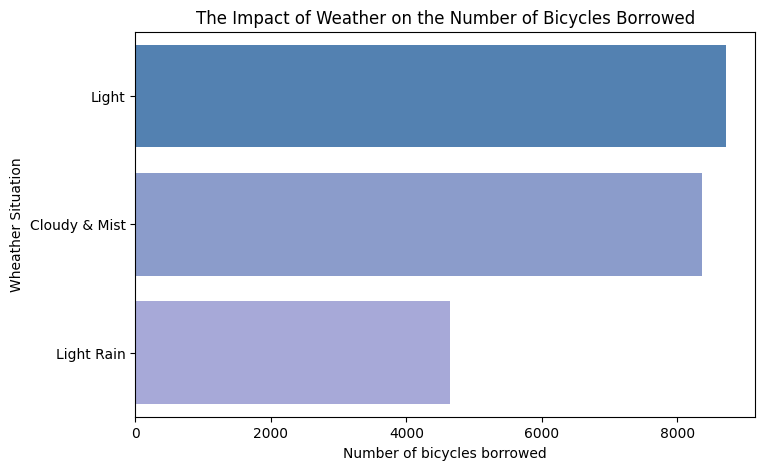

In [ ]:
weathersit_max = all_df.groupby(by="weathersit_d").agg({
    "cnt_d": "max",
})

plt.figure(figsize=(8, 5))
colors = ["#4381C1", "#8097D6", "#9FA2E0"]
sns.barplot(
    y="weathersit_d",
    x="cnt_d",
    orient="h",
    data=weathersit_max,
    hue="weathersit_d",
    palette=colors,
    legend=False
)

plt.xlabel("Number of bicycles borrowed")
plt.ylabel("Wheather Situation")
plt.title("The Impact of Weather on the Number of Bicycles Borrowed")
plt.yticks([0, 1, 2], ["Light", "Cloudy & Mist", "Light Rain"])
plt.show()

**From bar diagram of maximum number of bicycles borrowed:**
- Light: 8714 bikes
- Cloudy & Mist: 8362 bikes
- Light Rain: 4639 bikes


### Question 2 : What is the maximum volume of bicycles borrowed between weekdays and holidays?

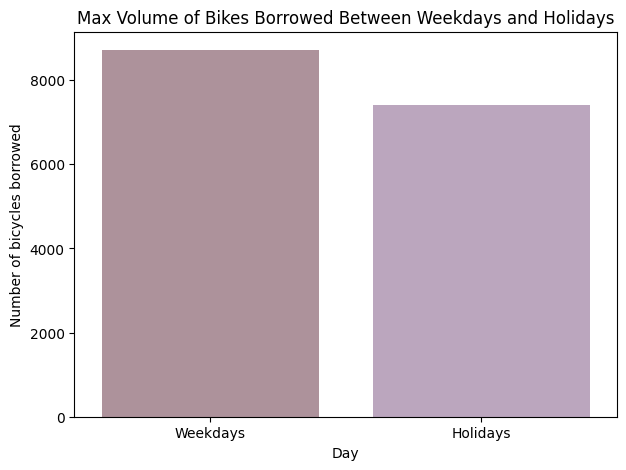

In [ ]:
holiday_max = all_df.groupby(by="holiday_d").agg({
    "cnt_d": "max",
})

plt.figure(figsize=(7, 5))
colors = ["#B18D9A", "#BEA2C2"]
sns.barplot(
    x="holiday_d",
    y="cnt_d",
    data=holiday_max,
    hue="holiday_d",
    palette=colors,
    legend=False

)

# plt.bar(x=day_df["holiday"], height=day_df["cnt"])
plt.xlabel("Day")
plt.ylabel("Number of bicycles borrowed")
plt.title("Max Volume of Bikes Borrowed Between Weekdays and Holidays")
plt.xticks([0, 1], ["Weekdays", "Holidays"])
plt.show()

**From diagram bar, days that the maximum volume of bicycles borrowed:**
- Weekdays at 8714 bicycles,
- Holidays at 7403 bicycles.


### Question 3 : What is the highest average number of registered bicycle users per hour?

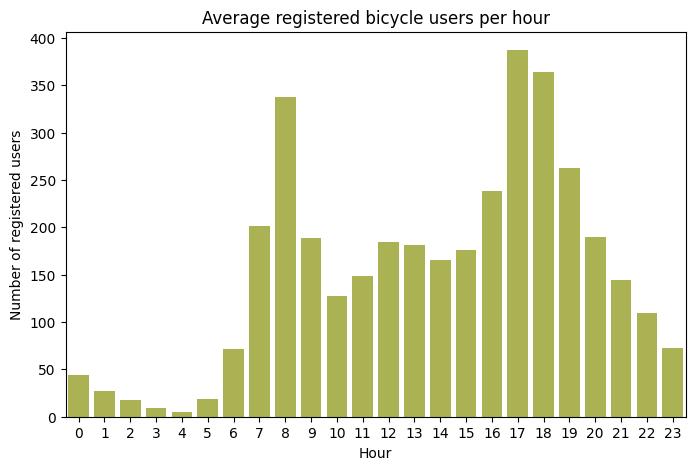

In [ ]:
vis_hour = all_df.groupby(by="hr").agg({
    "registered_h": "mean",
})

plt.figure(figsize=(8, 5))
colors = ["#B9C244"]
sns.barplot(
    x="hr",
    y="registered_h",
    data=vis_hour,
    hue="hr",
    palette=colors*24,
    legend=False
)

plt.xlabel("Hour")
plt.ylabel("Number of registered users")
plt.title("Average registered bicycle users per hour")
plt.show()

**From diagram bar, The highest average registered bicycle users occurred at 17.00**

## Conclusion

- #### Conclution Question 1:

The data shows that users tend to use bicycles less when the weather is less favorable. In rainy conditions, comfort and safety are the main factors that lead to a decrease in the number of bike loans. In contrast, mild weather provides optimal conditions for users to cycle. Bicycle rental services can utilize this data to improve services. For example, **offer discounts during rainy days or provide additional facilities**such as raincoat rentals to encourage usage.
- #### Conclution Question 2:

The data shows that bicycles are mostly used for routine activities such as commuting to work or school. During weekdays, bicycles are used as a daily mode of transportation. On holidays, on the other hand, the need for regular transportation is reduced, so the volume of borrowing decreases. Service providers may consider adjusting strategies. For example, **increasing the number of bicycles available on weekdays in strategic locations such as near offices and public transportation stations. For holidays, the focus could be shifted to tourist areas or parks to increase bicycle use.**
- #### Conclution Question 3:

Data shows that many registered bicycle users are workers who use bicycles as a mode of transportation to get home. This spike is in line with the afternoon rush hour, when many people finish work and look for transportation to return home. Bicycle rental service providers can ensure sufficient availability of bicycles in the afternoon, especially near office areas. Also, **improving infrastructure such as safer bike lanes during this time can improve user experience and attract more registered users.**

### Export File

In [ ]:
all_df.to_csv("dffix_clean.csv", index=False)